In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,"/home/albert/Work/git/cmclimate")
import cmclimate
import os
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)

sys.path.insert(0,'/home/albert//Work/git/CMEMS-diags/')
from natl60_3_5_by_5_boxes import boxes
sys.path.insert(0,'/home/albert/lib/python/AJ-spectre/')
import plot_box as pb


In [2]:
ds_data = xr.open_dataset('/mnt/albert/equipes/meom/workdir/albert/TSG/ALL_horizontal_gradients.nc', chunks={'time': 1e7})

In [3]:
ds_natl_T = xr.open_dataset('/mnt/albert/equipes/meom/workdir/albert/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2012m10d01-y2013m09d30.1d_hgradT_large-n80-f0.1.nc',chunks={'time_counter':1})
ds_natl_S = xr.open_dataset('/mnt/albert/equipes/meom/workdir/albert/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2012m10d01-y2013m09d30.1d_hgradS_large-n80-f0.1.nc',chunks={'time_counter':1})
ds_natl_b = xr.open_dataset('/mnt/albert/equipes/meom/workdir/albert/NATL60/NATL60-CJM165-S/filt/NATL60-CJM165_y2012m10d01-y2013m09d30.1d_hgradb_large-n80-f0.1.nc',chunks={'time_counter':1})


In [4]:
GSbox=(-65+360,-60+360,37,42)
NEbox=(-17+360,-12+360,50,55)
ACbox=(-30+360,-25+360,31,36)
_lon=ds_data['lon'][:]
_lat=ds_data['lat'][:]

domainGS=(GSbox[0]<_lon)*(_lon<GSbox[1])*(GSbox[2]<_lat)*(_lat<GSbox[3])

whereGS=np.where(domainGS)

latsGS=_lat[whereGS[0][:]]
lonsGS=_lon[whereGS[0][:]]

gradTGS=ds_data['SST_LS'][whereGS[0][:]]
gradSGS=ds_data['SSS_LS'][whereGS[0][:]]
gradbGS=ds_data['SSb_LS'][whereGS[0][:]]

domainNE=(NEbox[0]<_lon)*(_lon<NEbox[1])*(NEbox[2]<_lat)*(_lat<NEbox[3])

whereNE=np.where(domainNE)

latsNE=_lat[whereNE[0][:]]
lonsNE=_lon[whereNE[0][:]]

gradTNE=ds_data['SST_LS'][whereNE[0][:]]
gradSNE=ds_data['SSS_LS'][whereNE[0][:]]
gradbNE=ds_data['SSb_LS'][whereNE[0][:]]

domainAC=(ACbox[0]<_lon)*(_lon<ACbox[1])*(ACbox[2]<_lat)*(_lat<ACbox[3])

whereAC=np.where(domainAC)

latsAC=_lat[whereAC[0][:]]
lonsAC=_lon[whereAC[0][:]]

gradTAC=ds_data['SST_LS'][whereAC[0][:]]
gradSAC=ds_data['SSS_LS'][whereAC[0][:]]
gradbAC=ds_data['SSb_LS'][whereAC[0][:]]

gradTGS_nonan=gradTGS[~np.isnan(gradTGS)]
gradSGS_nonan=gradSGS[~np.isnan(gradSGS)]
gradbGS_nonan=gradbGS[~np.isnan(gradbGS)]
gradTNE_nonan=gradTNE[~np.isnan(gradTNE)]
gradSNE_nonan=gradSNE[~np.isnan(gradSNE)]
gradbNE_nonan=gradbNE[~np.isnan(gradbNE)]
gradTAC_nonan=gradTAC[~np.isnan(gradTAC)]
gradSAC_nonan=gradSAC[~np.isnan(gradSAC)]
gradbAC_nonan=gradbAC[~np.isnan(gradbAC)]

In [11]:
med=np.median(np.abs(gradTGS_nonan))

In [9]:
print gradTGS_nonan.values

[ 1.02945584e-04  1.44462297e-04 -7.17932829e-05 ...  2.88371868e-05
 -3.35557709e-05 -2.85253914e-06]


In [12]:
print med

1.8599632477733546e-05


Text(0.5,0,'deg C / $s^2$')

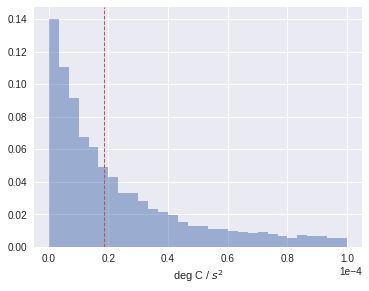

In [21]:
fig = plt.figure(figsize=(20.0, 15.0))
axes1 = fig.add_subplot(3, 3, 1)
weights = np.ones_like(gradTGS_nonan)/float(len(gradTGS_nonan))
med=np.median(np.abs(gradTGS_nonan))
axes1.hist(np.abs(gradTGS_nonan),30, alpha = 0.5,range=(0,1e-4),color='b', weights=weights, label='DATA')
axes1.axvline(med, color='r', linestyle='dashed', linewidth=1)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('deg C / $s^2$')

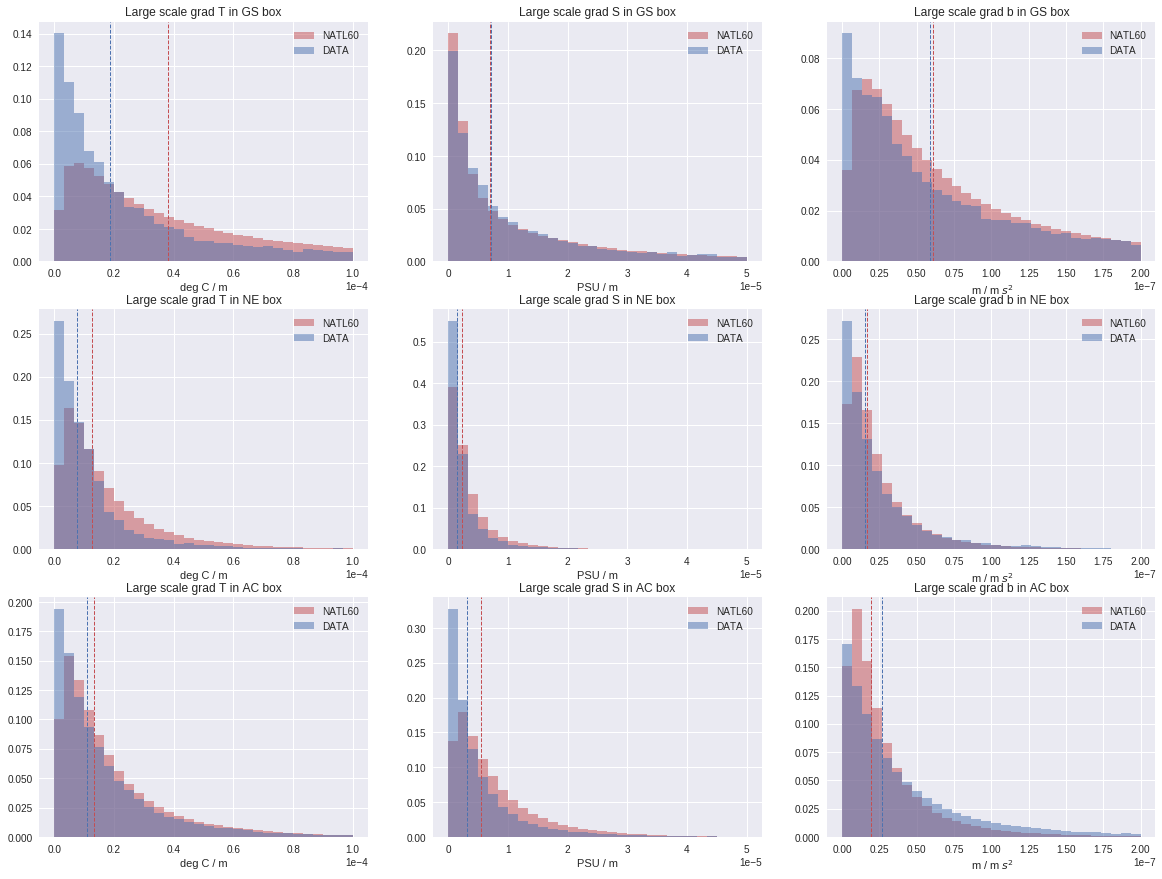

In [22]:
fig = plt.figure(figsize=(20.0, 15.0))

for box in boxes:
    
    gradT=ds_natl_T['vohgradb'][:,box.jmin:box.jmax,box.imin:box.imax].stack(z=('x', 'y','time_counter'))
    gradS=ds_natl_S['vohgradb'][:,box.jmin:box.jmax,box.imin:box.imax].stack(z=('x', 'y','time_counter'))
    gradb=ds_natl_b['vohgradb'][:,box.jmin:box.jmax,box.imin:box.imax].stack(z=('x', 'y','time_counter'))
    
    gradT_nonan=gradT[~np.isnan(gradT)]
    gradS_nonan=gradS[~np.isnan(gradS)]
    gradb_nonan=gradb[~np.isnan(gradb)]
    
    
    axes1 = fig.add_subplot(3, 3, (box.nb-1)*3+1)
    weights = np.ones_like(gradT_nonan)/float(len(gradT_nonan))
    med=np.median(np.abs(gradT_nonan))
    axes1.hist(gradT_nonan,30, alpha = 0.5,range=(0,1e-4),color='r', weights=weights, label='NATL60')
    axes1.axvline(med, color='r', linestyle='dashed', linewidth=1)
    if box.name == 'GS':
        weights = np.ones_like(gradTGS_nonan)/float(len(gradTGS_nonan))
        med=np.median(np.abs(gradTGS_nonan))
        axes1.hist(np.abs(gradTGS_nonan),30, alpha = 0.5,range=(0,1e-4),color='b', weights=weights, label='DATA')
        axes1.axvline(med, color='b', linestyle='dashed', linewidth=1)
    if box.name == 'NE':
        weights = np.ones_like(gradTNE_nonan)/float(len(gradTNE_nonan))
        med=np.median(np.abs(gradTNE_nonan))
        axes1.hist(np.abs(gradTNE_nonan),30, alpha = 0.5,range=(0,1e-4),color='b', weights=weights, label='DATA')
        axes1.axvline(med, color='b', linestyle='dashed', linewidth=1)
    if box.name == 'AC':
        weights = np.ones_like(gradTAC_nonan)/float(len(gradTAC_nonan))
        med=np.median(np.abs(gradTAC_nonan))
        axes1.hist(np.abs(gradTAC_nonan),30, alpha = 0.5,range=(0,1e-4),color='b', weights=weights, label='DATA')
        axes1.axvline(med, color='b', linestyle='dashed', linewidth=1)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.xlabel('deg C / m')
    plt.legend()
    plt.title('Large scale grad T in '+box.name+' box')

    axes2 = fig.add_subplot(3, 3, (box.nb-1)*3+2)
    weights = np.ones_like(gradS_nonan)/float(len(gradS_nonan))
    med=np.median(np.abs(gradS_nonan))
    axes2.hist(gradS_nonan,30, alpha = 0.5,range=(0,5e-5),color='r', weights=weights, label='NATL60')
    axes2.axvline(med, color='r', linestyle='dashed', linewidth=1)
    if box.name == 'GS':
        weights = np.ones_like(gradSGS_nonan)/float(len(gradSGS_nonan))
        med=np.median(np.abs(gradSGS_nonan))
        axes2.hist(np.abs(gradSGS_nonan),30, alpha = 0.5,range=(0,5e-5),color='b', weights=weights, label='DATA')
        axes2.axvline(med, color='b', linestyle='dashed', linewidth=1)
    if box.name == 'NE':
        weights = np.ones_like(gradSNE_nonan)/float(len(gradSNE_nonan))
        med=np.median(np.abs(gradSNE_nonan))
        axes2.hist(np.abs(gradSNE_nonan),30, alpha = 0.5,range=(0,5e-5),color='b', weights=weights, label='DATA')
        axes2.axvline(med, color='b', linestyle='dashed', linewidth=1)
    if box.name == 'AC':
        weights = np.ones_like(gradSAC_nonan)/float(len(gradSAC_nonan))
        med=np.median(np.abs(gradSAC_nonan))
        axes2.hist(np.abs(gradSAC_nonan),30, alpha = 0.5,range=(0,5e-5),color='b', weights=weights, label='DATA')
        axes2.axvline(med, color='b', linestyle='dashed', linewidth=1)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.xlabel('PSU / m')
    plt.legend()
    plt.title('Large scale grad S in '+box.name+' box')

    axes3 = fig.add_subplot(3, 3, (box.nb-1)*3+3)
    weights = np.ones_like(gradb_nonan)/float(len(gradb_nonan))
    med=np.median(np.abs(gradb_nonan))
    axes3.hist(gradb_nonan,30, alpha = 0.5,range=(0,2e-7),color='r', weights=weights, label='NATL60')
    axes3.axvline(med, color='r', linestyle='dashed', linewidth=1)
    if box.name == 'GS':
        weights = np.ones_like(gradbGS_nonan)/float(len(gradbGS_nonan))
        med=np.median(np.abs(gradbGS_nonan))
        axes3.hist(np.abs(gradbGS_nonan),30, alpha = 0.5,range=(0,2e-7),color='b', weights=weights, label='DATA')
        axes3.axvline(med, color='b', linestyle='dashed', linewidth=1)
    if box.name == 'NE':
        weights = np.ones_like(gradbNE_nonan)/float(len(gradbNE_nonan))
        med=np.median(np.abs(gradbNE_nonan))
        axes3.hist(np.abs(gradbNE_nonan),30, alpha = 0.5,range=(0,2e-7),color='b', weights=weights, label='DATA')
        axes3.axvline(med, color='b', linestyle='dashed', linewidth=1)
    if box.name == 'AC':
        weights = np.ones_like(gradbAC_nonan)/float(len(gradbAC_nonan))
        med=np.median(np.abs(gradbAC_nonan))
        axes3.hist(np.abs(gradbAC_nonan),30, alpha = 0.5,range=(0,2e-7),color='b', weights=weights, label='DATA')
        axes3.axvline(med, color='b', linestyle='dashed', linewidth=1)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.xlabel(' m / m $s^2$')
    plt.legend()
    plt.title('Large scale grad b in '+box.name+' box')
plt.savefig('hist_grad_natl60-data.png')